In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [379]:
df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\Loan\Mobility analytics.csv")

In [380]:
df.shape

(131662, 14)

In [381]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [382]:
df.Surge_Pricing_Type.value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [383]:
df.drop('Trip_ID',axis=1,inplace=True)

In [384]:
df.isnull().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 13 columns):
Trip_Distance                  131662 non-null float64
Type_of_Cab                    111452 non-null object
Customer_Since_Months          125742 non-null float64
Life_Style_Index               111469 non-null float64
Confidence_Life_Style_Index    111469 non-null object
Destination_Type               131662 non-null object
Customer_Rating                131662 non-null float64
Cancellation_Last_1Month       131662 non-null int64
Var1                           60632 non-null float64
Var2                           131662 non-null int64
Var3                           131662 non-null int64
Gender                         131662 non-null object
Surge_Pricing_Type             131662 non-null int64
dtypes: float64(5), int64(4), object(4)
memory usage: 13.1+ MB


In [386]:
numerical=df.select_dtypes(exclude='O')

In [387]:
numerical.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

In [388]:
cat=df.select_dtypes(include='O')

In [389]:
cat.columns

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')

In [390]:
cat.head(3)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
0,B,A,A,Female
1,B,B,A,Male
2,NaN,NaN,E,Male


In [391]:
numerical.head(3)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2
2,41.58,10.0,NaN,3.50125,2,NaN,56,77,2


In [392]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [393]:
impute_it=IterativeImputer()
numerical1=impute_it.fit_transform(numerical)

In [394]:
numerical1=pd.DataFrame(numerical1,columns=['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'])

In [395]:
df.drop(numerical,axis=1,inplace=True)

In [396]:
df=pd.concat([df,numerical1],axis=1)

In [397]:
cat.isna().sum()

Type_of_Cab                    20210
Confidence_Life_Style_Index    20193
Destination_Type                   0
Gender                             0
dtype: int64

In [398]:
cat['Type_of_Cab'].mode()

0    B
dtype: object

In [399]:
df['Type_of_Cab'].fillna('B',inplace=True)

In [400]:
cat.isna().sum()

Type_of_Cab                    20210
Confidence_Life_Style_Index    20193
Destination_Type                   0
Gender                             0
dtype: int64

In [401]:
df['Confidence_Life_Style_Index'].value_counts()

B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [402]:
df['Confidence_Life_Style_Index'].fillna('B',inplace=True)

In [403]:
df.isna().sum()

Type_of_Cab                    0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
Trip_Distance                  0
Customer_Since_Months          0
Life_Style_Index               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Surge_Pricing_Type             0
dtype: int64

In [404]:
df.head()

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
0,B,A,A,Female,6.77,1.0,2.427690,3.90500,0.0,40.000000,46.0,60.0,2.0
1,B,B,A,Male,29.47,10.0,2.782450,3.45000,0.0,38.000000,56.0,78.0,2.0
2,B,B,E,Male,41.58,10.0,2.898417,3.50125,2.0,64.623535,56.0,77.0,2.0
3,C,B,A,Male,61.56,10.0,2.893587,3.45375,0.0,62.131584,52.0,74.0,3.0
4,C,B,A,Male,54.95,10.0,3.034530,3.40250,4.0,51.000000,49.0,102.0,2.0


In [405]:
df_cab=pd.DataFrame(df.groupby('Type_of_Cab')[['Trip_Distance']].sum().reset_index())

Text(0.5, 1.0, 'Business made by each cab')

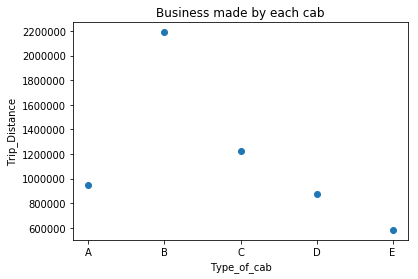

In [406]:
plt.scatter(df_cab['Type_of_Cab'],df_cab['Trip_Distance'])
plt.xlabel('Type_of_cab')
plt.ylabel('Trip_Distance')
plt.title('Business made by each cab')

In [407]:
cat.columns

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')

In [408]:
cat_dummy=pd.get_dummies(cat,drop_first=True)

In [409]:
df.drop(cat,axis=1,inplace=True)

In [410]:
df=pd.concat([df,cat_dummy],axis=1)

In [411]:
df.shape

(131662, 29)

In [412]:
df.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type', 'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D',
       'Type_of_Cab_E', 'Confidence_Life_Style_Index_B',
       'Confidence_Life_Style_Index_C', 'Destination_Type_B',
       'Destination_Type_C', 'Destination_Type_D', 'Destination_Type_E',
       'Destination_Type_F', 'Destination_Type_G', 'Destination_Type_H',
       'Destination_Type_I', 'Destination_Type_J', 'Destination_Type_K',
       'Destination_Type_L', 'Destination_Type_M', 'Destination_Type_N',
       'Gender_Male'],
      dtype='object')

In [414]:
corr=df.corr(method='spearman')

In [416]:
corr_target=corr['Surge_Pricing_Type']

In [351]:
y=pd.DataFrame(df.Surge_Pricing_Type)

In [352]:
df.drop('Surge_Pricing_Type',axis=1,inplace=True)

In [353]:
x=df

In [367]:
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost import XGBClassifier

In [369]:
bc=BaggingClassifier(random_state=1)
bc.fit(x,y)
y_pred=bc.predict(x)

In [373]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,r2_score

In [374]:
r2_score(y,y_pred)

0.9743797923499254

In [376]:
skf=StratifiedKFold(5,shuffle=True,random_state=1)
print(cross_val_score(bc,x,y,cv=skf,scoring='accuracy'))

[0.77845289 0.77666806 0.77454145 0.77817864 0.77589153]


In [422]:
test_df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\test_VsU9xXK.csv")

In [423]:
test_df.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [424]:
test_df.drop('Trip_ID',axis=1,inplace=True)

In [425]:
test_df.head(3)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male


In [431]:
cat=test_df.select_dtypes(include='O')

In [432]:
numerical=test_df.select_dtypes(exclude='O')

In [433]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

impute_it=IterativeImputer()
numerical1=impute_it.fit_transform(numerical)

numerical1=pd.DataFrame(numerical1,columns=['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3'])

test_df.drop(numerical,axis=1,inplace=True)

test_df=pd.concat([test_df,numerical1],axis=1)

cat['Type_of_Cab'].mode()
test_df['Type_of_Cab'].fillna('B',inplace=True)
test_df['Confidence_Life_Style_Index'].fillna('B',inplace=True)
cat_dummy=pd.get_dummies(cat,drop_first=True)
test_df.drop(cat,axis=1,inplace=True)
test_df=pd.concat([test_df,cat_dummy],axis=1)

In [434]:
test_df.shape

(87395, 28)

In [436]:
x_test=test_df

In [438]:
x_test_predict=pd.DataFrame(bc.predict(x_test))

In [440]:
x_test_predict.to_csv('sample_submission.csv',index=False)